# Most Efficient Type of Workout

### Dataset origin & description
This dataset originates from Kaggle. It provides an overview about gym members, their routines, physcial attributes and fitness activity. The dataset shows common descriptors of members such as age, gender, weight, and height. The dataset even shows how they perform while working out by giving us an insight into their max heart rate, average heart rate, and their resting heart rate, etc... With this data we will attempt to determine which type of workout is the most efficient at burning calories relative to time and effort.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style = ('darkgrid')
df = pd.read_csv('gym_members_exercise_tracking.csv')

### Preprocessing/cleaning steps (with rationale)
This dataset was quite complete as is, after reviewing the data that I needed I found that there wasn't any filtering needed. 

### Visualization/design choices (why these charts and designs)
#### Why the bar chart?
Starting off we simply want to start broad and we do this by looking at a barplot. With the barplot we split up the workout types by the amount of average calories burned with these workout types. We also use distinctive colors so that the viewer can easily distinguish the different types of workout. This graph however, does not show us a huge difference in the calories burned between our 4 types.

[Text(0.5, 0, 'Workout Type'), Text(0, 0.5, 'Calories Burned')]

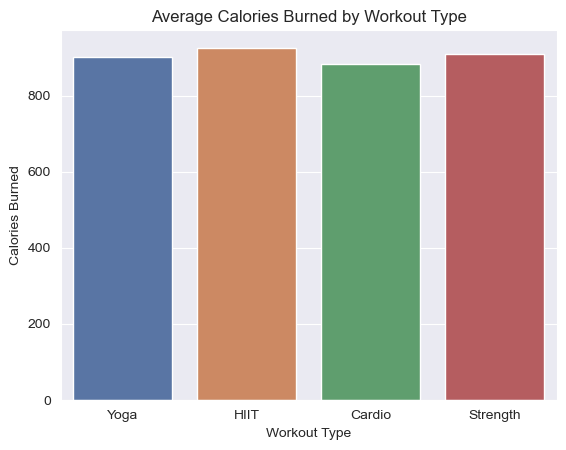

In [16]:
a = sns.barplot(x = "Workout_Type", y = "Calories_Burned", data = df, errorbar = None, hue = "Workout_Type", palette= "deep")
a.set_title("Average Calories Burned by Workout Type")
a.set(xlabel = "Workout Type", ylabel = "Calories Burned")

#### Why the boxplots?
These barplot are the first step into getting more accurate representations of the workouts vs how many calories the people are burning. By splitting the data into half hour increments and getting the ranges of calories burnt we can get a better distribution and get a little closer to answering our question. Fromthis we see that strength training consistently does well burning calories per hour and that HIIT workouts spike in the IQR (interquartile range) when done for longer periods of time. This is our first step to getting more precise data visualizations.

[Text(0.5, 0, 'Session Duration by Hours'), Text(0, 0.5, 'Calories per Hour')]

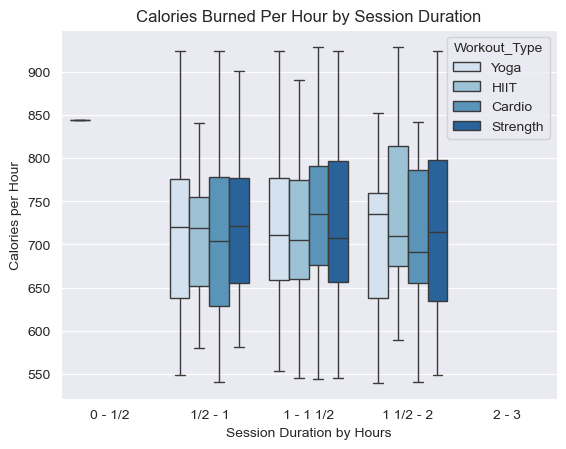

In [94]:
df["Calories_per_Hour"] = df["Calories_Burned"] / df["Session_Duration (hours)"]
bins = [0, .5, 1, 1.5, 2, 3]
labels = ["0 - 1/2", "1/2 - 1", "1 - 1 1/2", "1 1/2 - 2", "2 - 3"]
df ["Duration_Bin"] = pd.cut(df["Session_Duration (hours)"], bins = bins, labels = labels)

b = sns.boxplot(x = "Duration_Bin", y = "Calories_per_Hour", data = df, hue = "Workout_Type", palette= "Blues")
b.set_title("Calories Burned Per Hour by Session Duration")
b.set(xlabel = ("Session Duration by Hours"), ylabel = ("Calories per Hour"))

#### Why the lineplots?
Lineplots are great for showing trends and progression as time or whatever you x axis uses goes on. In this case we want to see the trend of calories burning per hour compared to how much a persons heart rate per minute is. The goal of this graph is to show efficiency, by seeing which workout type has a lower heart rate and higher calories per hour more consistently will help us come to a conclusion about which workouts a person should be doing to burn more calories.

[Text(0.5, 0, 'Average Heart Rate per Minute'),
 Text(0, 0.5, 'Calories per Hour')]

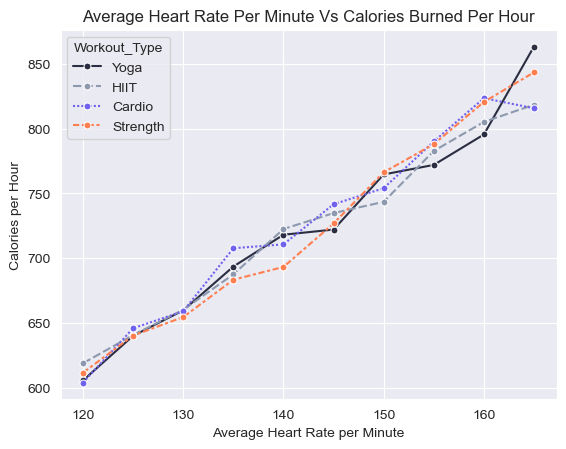

In [114]:
df["BPM_Bin"] = (df["Avg_BPM"] // 5) * 5
df_grouped = df.groupby("BMP_Bin")["Calories_per_Hour"].mean().reset_index()

c = sns.lineplot(x = "BPM_Bin", y = "Calories_per_Hour", data = df, hue = "Workout_Type", palette=["#2B2D42", "#8D99AE", "#7161EF", "#FF7F51"], errorbar=None,style="Workout_Type", marker="o", markersize = 5)
c.set_title("Average Heart Rate Per Minute Vs Calories Burned Per Hour")
c.set(xlabel="Average Heart Rate per Minute", ylabel="Calories per Hour")

#### Why the bar chart?
Once again the bar chart is good for showing groups, in this case we want to split the groups by age otherwise we'd have values for ages all the way from 18 to 62. With this we can see trends on how age effects calories burned, by doing this we can see if maybe age is a bigger factor to calories burned than the type of workout you are doing.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '18-22'),
  Text(1, 0, '22-26'),
  Text(2, 0, '26-30'),
  Text(3, 0, '30-34'),
  Text(4, 0, '34-38'),
  Text(5, 0, '38-42'),
  Text(6, 0, '42-46'),
  Text(7, 0, '46-50'),
  Text(8, 0, '50-54'),
  Text(9, 0, '54-58'),
  Text(10, 0, '58-62')])

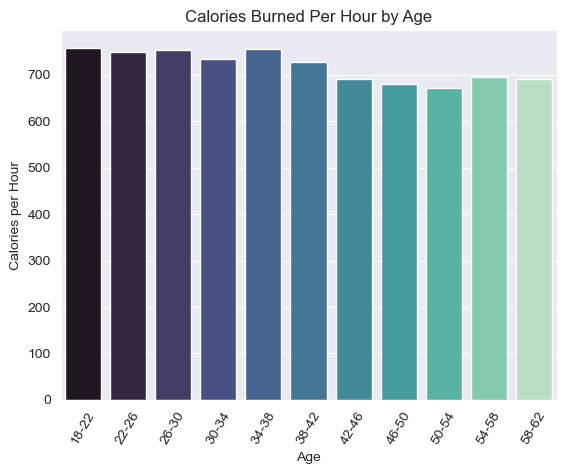

In [118]:
bins = [18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]
labels = ["18-22", "22-26", "26-30", "30-34", "34-38", "38-42", "42-46", "46-50", "50-54", "54-58", "58-62"]
df ["Age_Bin"] = pd.cut(df["Age"], bins = bins, labels = labels)


d = sns.barplot(x = "Age_Bin", y = "Calories_per_Hour", data = df,hue = "Age_Bin", palette="mako", errorbar = None, legend=False)
d.set_title("Calories Burned Per Hour by Age")
d.set(xlabel = "Age", ylabel="Calories per Hour")
plt.xticks(rotation = 60)

#### Reflection
Overall, I think my visuals looked good and I was able to tell a simple story. I do wish that I had data with more variety that could tell a more definitive story. I probably could have acheived that by diving deeper and even looking at the gym members physical attributes but that would have taken a lot more visuals and explaining to even begin to see results. Next time I would sample more data and see if anything has more definitive conclusions.

#### Sources
https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset